# Knacksack Problem



In [12]:
import numpy as np

In [13]:

class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
    """

    def __init__(self):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]

        self.maxCapacity = 400

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))
        
        


In [14]:
# create a problem instance:
knapsack = Knapsack01Problem()

# creaete a random solution and evaluate it:
randomSolution = np.random.randint(2, size=len(knapsack))
print("Random Solution = ")
print(randomSolution)
knapsack.printItems(randomSolution)

Random Solution = 
[1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1]
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding glucose: weight = 15, value = 60, accumulated weight = 37, accumulated value = 245
- Adding apple: weight = 39, value = 40, accumulated weight = 76, accumulated value = 285
- Adding cheese: weight = 23, value = 30, accumulated weight = 99, accumulated value = 315
- Adding t-shirt: weight = 24, value = 15, accumulated weight = 123, accumulated value = 330
- Adding waterproof overclothes: weight = 43, value = 75, accumulated weight = 166, accumulated value = 405
- Adding note-case: weight = 22, value = 80, accumulated weight = 188, accumulated value = 485
- Adding book: weight = 30, value = 10, accumulated weight = 218, accumulated value = 495
- Total weight = 218, Total value = 495


In [15]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

import knapsack


In [16]:

# problem constants:
# create the knapsack problem instance to be used:
knapsack = knapsack.Knapsack01Problem()

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [17]:

toolbox = base.Toolbox()
# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)


In [18]:

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


c:\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [19]:


# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple


toolbox.register("evaluate", knapsackValue)

In [20]:
# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))

In [21]:


# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)


gen	nevals	max	avg   
0  	50    	805	595.86
1  	50    	860	704.66
2  	48    	867	750.42
3  	46    	905	793.74
4  	48    	945	826.8 
5  	46    	955	858.18
6  	42    	1000	897.02
7  	44    	1002	916   
8  	46    	1030	952.2 
9  	45    	1030	974.14
10 	50    	1030	985.88
11 	48    	1030	998.9 
12 	45    	1030	1003.7
13 	47    	1030	1023.3
14 	45    	1030	1018.9
15 	46    	1030	1021.6
16 	47    	1030	1022.1
17 	48    	1030	1026.7
18 	46    	1030	1020  
19 	43    	1030	1018.34
20 	46    	1030	1024.9 
21 	46    	1030	1016.9 
22 	45    	1030	1022.8 
23 	46    	1030	1027.7 
24 	44    	1030	1021.1 
25 	49    	1030	1025.7 
26 	44    	1030	1015.6 
27 	42    	1030	1017.1 
28 	44    	1030	1017.1 
29 	43    	1030	1023.24
30 	50    	1030	1025.6 
31 	46    	1030	1025.5 
32 	48    	1030	1027.5 
33 	46    	1030	1030   
34 	47    	1030	1018.74
35 	47    	1030	1023.2 
36 	36    	1030	1024.1 
37 	48    	1030	1016.1 
38 	45    	1030	1022.6 
39 	42    	1030	1018.7 
40 	47    	1030	1022.94
41 	46    	1030	102

-- Best Ever Individual =  [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
-- Best Ever Fitness =  1030.0
-- Knapsack Items = 
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding water: weight = 153, value = 200, accumulated weight = 175, accumulated value = 385
- Adding sandwich: weight = 50, value = 160, accumulated weight = 225, accumulated value = 545
- Adding glucose: weight = 15, value = 60, accumulated weight = 240, accumulated value = 605
- Adding banana: weight = 27, value = 60, accumulated weight = 267, accumulated value = 665
- Adding suntan cream: weight = 11, value = 70, accumulated weight = 278, accumulated value = 735
- Adding waterproof trousers: weight = 42, value = 70, accumulated weight = 320, accumulated value = 805
- Adding waterproof overclothes: weight = 43, value = 75, accumulated weight = 363, accumulated val

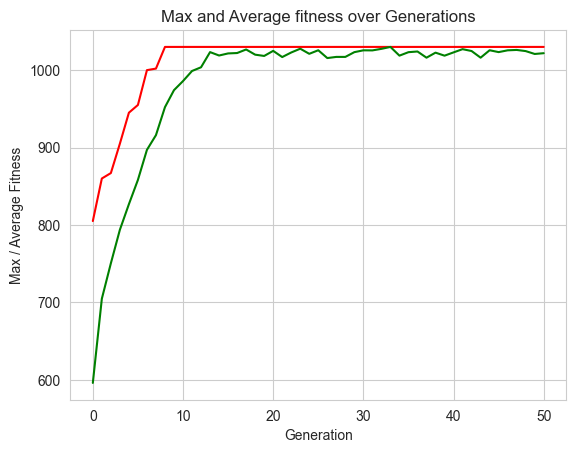

In [22]:

# print best solution found:
best = hof.items[0]
print("-- Best Ever Individual = ", best)
print("-- Best Ever Fitness = ", best.fitness.values[0])

print("-- Knapsack Items = ")
knapsack.printItems(best)

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()
